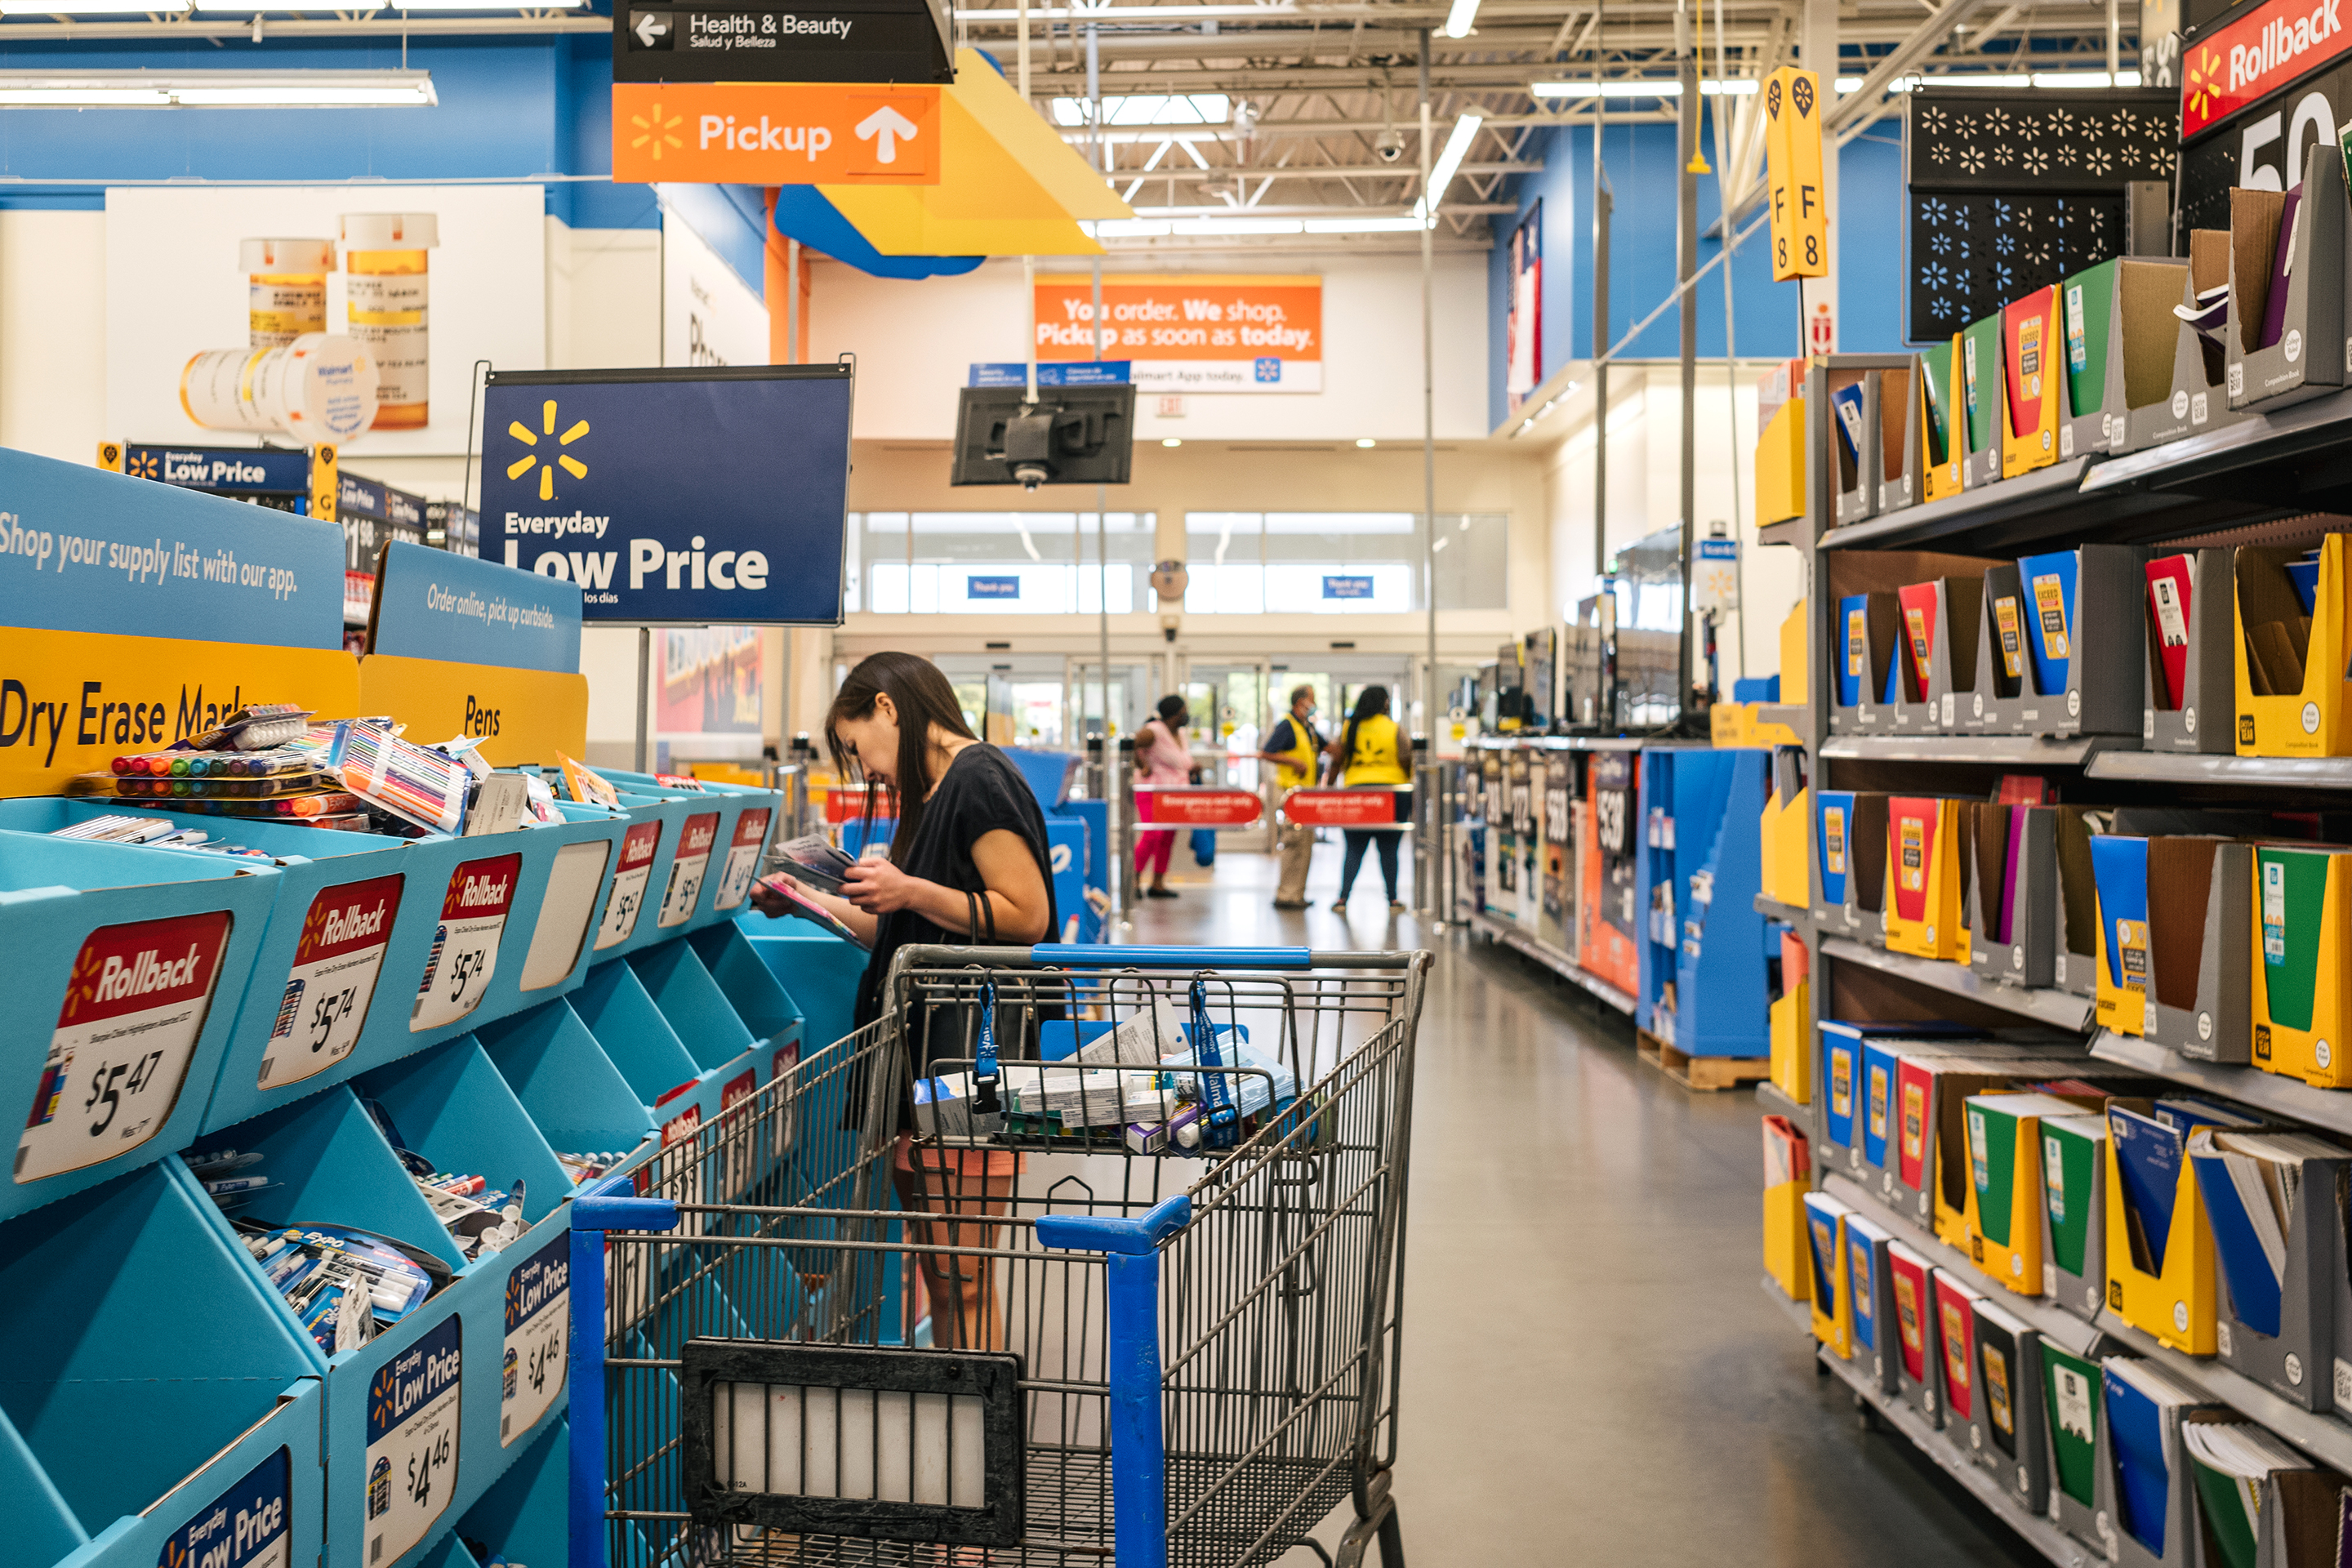

In [1]:
from IPython import display
display.Image('https://content.fortune.com/wp-content/uploads/2021/10/CTW-2021-15-Walmart-GettyImages-1332401167.jpg',
             width=500, height=400)

### Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:\
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

---

# <center>1. Importing Libraries and Datasets

In [2]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

import itertools

import warnings
warnings.filterwarnings("ignore")

In [3]:
# First let us load the datasets into different Dataframes
from IPython.display import display
path = 'D:/Other/My_DataScience_projects/Walmart Sales Forecast/Data/'
def load_data(dataset):
    data = pd.read_csv(path+dataset)
    data.name = dataset
    print(data.name)
    print('Shape:', data.shape)
    display(data.sample(10))
    print('-'*60)
    return data

df_train = load_data('train.csv')
df_test = load_data('test.csv')
df_features = load_data('features.csv')
df_stores = load_data('stores.csv')

train.csv
Shape: (421570, 5)


Store  Dept        Date  Weekly_Sales  IsHoliday
227665     24     6  2011-08-26       4477.70      False
308367     32    33  2012-04-06       4369.79      False
276091     28    92  2010-11-12      94483.24      False
51471       6    20  2012-09-28       6948.51      False
327165     34    55  2011-02-11      11589.43       True
227940     24     8  2011-06-10      48906.31      False
24142       3    27  2012-04-06        493.66      False
371030     40     1  2011-07-15      14415.45      False
119266     13    12  2011-10-07       8862.37      False
137809     14    97  2010-06-11      29269.06      False

------------------------------------------------------------
test.csv
Shape: (115064, 4)


Store  Dept        Date  IsHoliday
32529      13    13  2012-12-14      False
54920      21    29  2013-01-18      False
54557      21    19  2013-07-26      False
87084      33    93  2013-06-28      False
54013      21     4  2013-06-28      False
101930     40    25  2013-04-12      False
45577      17    98  2013-05-17      False
107266     42    25  2013-01-18      False
24976      10    30  2012-11-02      False
113098     45    19  2012-11-23       True

------------------------------------------------------------
features.csv
Shape: (8190, 12)


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
8104     45  2011-12-09        46.57       3.415    6176.69       2.87   
5847     33  2010-07-16       100.14       2.971        NaN        NaN   
2715     15  2013-04-19        50.36       3.876    1934.68     111.95   
7249     40  2012-12-28        23.54       3.560    9455.96   19951.08   
992       6  2011-09-02        91.22       3.533        NaN        NaN   
2649     15  2012-01-13        36.26       3.666    1684.66    8959.27   
7853     44  2010-08-13        74.93       2.837        NaN        NaN   
4219     24  2010-09-24        64.30       2.837        NaN        NaN   
3324     19  2011-01-07        31.34       3.351        NaN        NaN   
498       3  2012-08-31        85.18       3.638    6599.69      27.80   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
8104     379.57    1593.44   10170.50  188.654469         8.523      False  
5847        NaN        NaN        NaN  126.149806         9.495      False  
2715      80.00      72.55     284.57  139.122613         7.806      False  
7249     149.44       6.94    2254.32  138.488226         4.145       True  
992         NaN        NaN        NaN  217.334342         6.925      False  
2649       1.00     487.76     542.90  136.753000         7.943      False  
7853        NaN        NaN        NaN  126.064000         7.804      False  
4219        NaN        NaN        NaN  132.761933         8.117      False  
3324        NaN        NaN        NaN  132.882323         7.771      False  
498       24.70    1743.76     428.74  225.829306         6.334      False

------------------------------------------------------------
stores.csv
Shape: (45, 3)


Store Type    Size
16     17    B   93188
10     11    A  207499
9      10    B  126512
21     22    B  119557
3       4    A  205863
6       7    B   70713
13     14    A  200898
43     44    C   39910
22     23    B  114533
23     24    A  203819

------------------------------------------------------------


In [4]:
# merging 3 different datasets (for train set)
df_tr = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df_tr.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

In [5]:
# removing duplicated column
df_tr.drop(['IsHoliday_y'], axis=1,inplace=True) 

# rename the duplicated column 
df_tr.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [6]:
df_tr.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [7]:
df_tr.shape

(421570, 16)

In [8]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


## <center> 2. Exploratory Data Analysis (EDA) & Data Pre-processing

In [9]:
df_tr.describe().transpose()

count           mean           std        min           25%  \
Store         421570.0      22.200546     12.785297      1.000     11.000000   
Dept          421570.0      44.260317     30.492054      1.000     18.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940   2079.650000   
Temperature   421570.0      60.090059     18.447931     -2.060     46.680000   
Fuel_Price    421570.0       3.361027      0.458515      2.472      2.933000   
MarkDown1     150681.0    7246.420196   8291.221345      0.270   2240.270000   
MarkDown2     111248.0    3334.628621   9475.357325   -265.760     41.600000   
MarkDown3     137091.0    1439.421384   9623.078290    -29.100      5.080000   
MarkDown4     134967.0    3383.168256   6292.384031      0.220    504.220000   
MarkDown5     151432.0    4628.975079   5962.887455    135.160   1878.440000   
CPI           421570.0     171.201947     39.159276    126.064    132.022667   
Unemployment  421570.0       7.960289      1.863296      3.879      6.891000   
Size          421570.0  136727.915739  60980.583328  34875.000  93638.000000   

                       50%            75%            max  
Store             22.00000      33.000000      45.000000  
Dept              37.00000      74.000000      99.000000  
Weekly_Sales    7612.03000   20205.852500  693099.360000  
Temperature       62.09000      74.280000     100.140000  
Fuel_Price         3.45200       3.738000       4.468000  
MarkDown1       5347.45000    9210.900000   88646.760000  
MarkDown2        192.00000    1926.940000  104519.540000  
MarkDown3         24.60000     103.990000  141630.610000  
MarkDown4       1481.31000    3595.040000   67474.850000  
MarkDown5       3359.45000    5563.800000  108519.280000  
CPI              182.31878     212.416993     227.232807  
Unemployment       7.86600       8.572000      14.313000  
Size          140167.00000  202505.000000  219622.000000

In [10]:
df_tr['Store'].nunique() # number of different numerical values

45

In [11]:
df_tr['Dept'].nunique() # number of different numerical values

81

In [12]:
df_tr['Type'].value_counts() # number of different categorical values

A    215478
B    163495
C     42597
Name: Type, dtype: int64

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81. 

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [13]:
df_tr.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

### Markdown Columns

Walmart gave markdown columns to see the effect if markdowns on sales. When I check columns, there are many NaN values for markdowns. I decided to change them with 0, because if there is markdown in the row, it is shown with numbres. So, if I can write 0, it shows there is no markdown at that date.

In [14]:
# filling null's with 0
df_tr = df_tr.fillna(0)

In [15]:
df_tr.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

### sales

In [16]:
# count of negative sales rows
df_tr.loc[df_tr['Weekly_Sales']<=0].shape[0]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


1358

In [17]:
(df_tr.loc[df_tr['Weekly_Sales']<=0].shape[0] / df_tr.shape[0])*100

0.3221291837654482

1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [18]:
df_tr = df_tr.loc[df_tr['Weekly_Sales'] > 0]

In [19]:
df_tr.shape # new data shape

(420212, 16)

### Date

In [20]:
# to see first and last 5 rows.
df_tr['Date'].head(5).append(df_tr['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

Our data is from 5th of February 2010 to 26th of October 2012.  

In [21]:
#Sorting data with respect to date
df_tr=df_tr.sort_values(by='Date')

### IsHoliday column

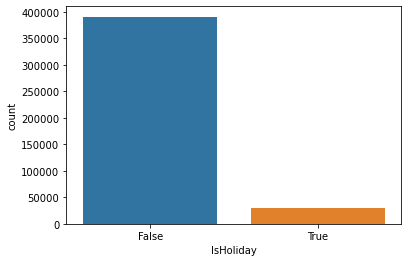

In [22]:
sns.countplot(df_tr['IsHoliday'])
plt.show()

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

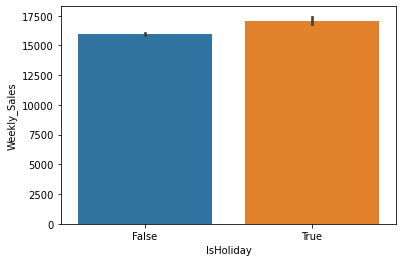

In [23]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df_tr)

In [24]:
df_holiday = df_tr.loc[df_tr['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [25]:
df_not_holiday = df_tr.loc[df_tr['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False. 

In [26]:
# Super bowl dates in train set
df_tr.loc[(df_tr['Date'] == '2010-02-12')|(df_tr['Date'] == '2011-02-11')|(df_tr['Date'] == '2012-02-10'),'Super_Bowl'] = True
df_tr.loc[(df_tr['Date'] != '2010-02-12')&(df_tr['Date'] != '2011-02-11')&(df_tr['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [27]:
# Labor day dates in train set
df_tr.loc[(df_tr['Date'] == '2010-09-10')|(df_tr['Date'] == '2011-09-09')|(df_tr['Date'] == '2012-09-07'),'Labor_Day'] = True
df_tr.loc[(df_tr['Date'] != '2010-09-10')&(df_tr['Date'] != '2011-09-09')&(df_tr['Date'] != '2012-09-07'),'Labor_Day'] = False

In [28]:
# Thanksgiving dates in train set
df_tr.loc[(df_tr['Date'] == '2010-11-26')|(df_tr['Date'] == '2011-11-25'),'Thanksgiving'] = True
df_tr.loc[(df_tr['Date'] != '2010-11-26')&(df_tr['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [29]:
#Christmas dates in train set
df_tr.loc[(df_tr['Date'] == '2010-12-31')|(df_tr['Date'] == '2011-12-30'),'Christmas'] = True
df_tr.loc[(df_tr['Date'] != '2010-12-31')&(df_tr['Date'] != '2011-12-30'),'Christmas'] = False

In [30]:
df_tr.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50      False        42.31   
330761     35     3  2010-02-05      14612.19      False        27.19   
330762     35     4  2010-02-05      26323.15      False        27.19   
330763     35     5  2010-02-05      36414.63      False        27.19   
330764     35     6  2010-02-05      11437.81      False        27.19   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        0.0        0.0        0.0        0.0        0.0   
330761       2.784        0.0        0.0        0.0        0.0        0.0   
330762       2.784        0.0        0.0        0.0        0.0        0.0   
330763       2.784        0.0        0.0        0.0        0.0        0.0   
330764       2.784        0.0        0.0        0.0        0.0        0.0   

               CPI  Unemployment Type    Size Super_Bowl Labor_Day  \
0       211.096358         8.106    A  151315      False     False   
330761  135.352461         9.262    B  103681      False     False   
330762  135.352461         9.262    B  103681      False     False   
330763  135.352461         9.262    B  103681      False     False   
330764  135.352461         9.262    B  103681      False     False   

       Thanksgiving Christmas  
0             False     False  
330761        False     False  
330762        False     False  
330763        False     False  
330764        False     False

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

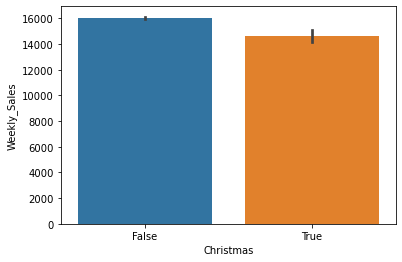

In [31]:
# Christmas holiday vs not-Christmas
sns.barplot(x='Christmas', y='Weekly_Sales', data=df_tr)

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

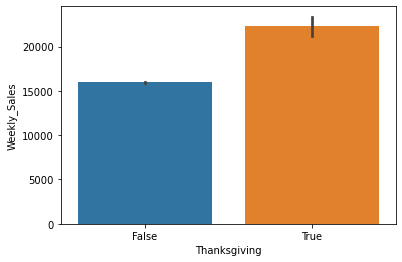

In [32]:
# Thanksgiving holiday vs not-thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df_tr)

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

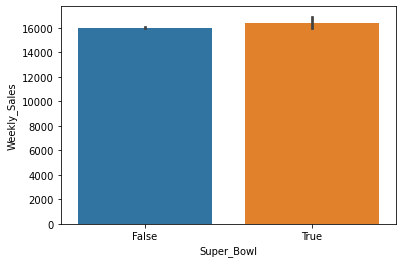

In [33]:
# Super bowl holiday vs not-super bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df_tr)

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

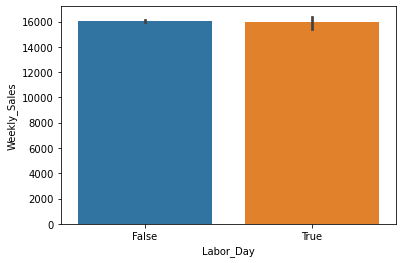

In [34]:
# Labor day holiday vs not-labor day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df_tr)

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

### Type vs Holidays

There are three different store types in the data as A, B and C.

In [35]:
df_tr['Type'].value_counts() # number of different categorical values

A    214961
B    162787
C     42464
Name: Type, dtype: int64

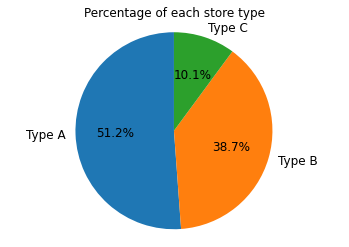

In [36]:
# Pie plot for store types
stores = ['Type A','Type B','Type C']
data_type = df_tr['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data_type, labels = stores, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12})
ax.set_title('Percentage of each store type')
ax.axis('equal')
mpl.rcParams.update({'font.size': 12}) #bigger percentage labels

# show plot
plt.show()

#### <center>Let's see the Size - Type relation

In [37]:
df_stores.groupby('Type').describe()['Size'].round(1)

count      mean      std      min       25%       50%       75%  \
Type                                                                    
A      22.0  177247.7  49392.6  39690.0  155840.8  202406.0  203819.0   
B      17.0  101190.7  32371.1  34875.0   93188.0  114533.0  123737.0   
C       6.0   40541.7   1304.1  39690.0   39745.0   39910.0   40774.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

A is the biggest store type and C is the smallest.

In [38]:
### Type Effects on Holidays sales

# Avg weekly sales for types on Christmas 
df_tr.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [39]:
# Avg weekly sales for types on Labor Day
df_tr.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [40]:
# Avg weekly sales for types on Thanksgiving
df_tr.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [41]:
# Avg weekly sales for types on Super Bowl
df_tr.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

The bigger the store (Type A), the higher the sales.

In [42]:
df_tr.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64


<center>Let's put it all together

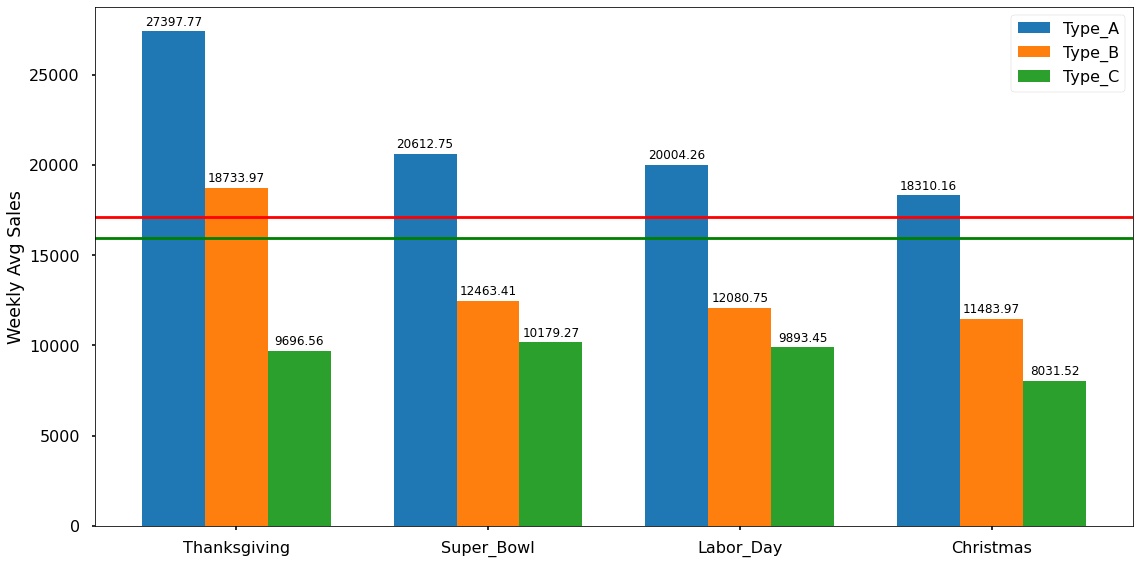

In [43]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

### Deeper Look in Sales (relation with other departments and stores)

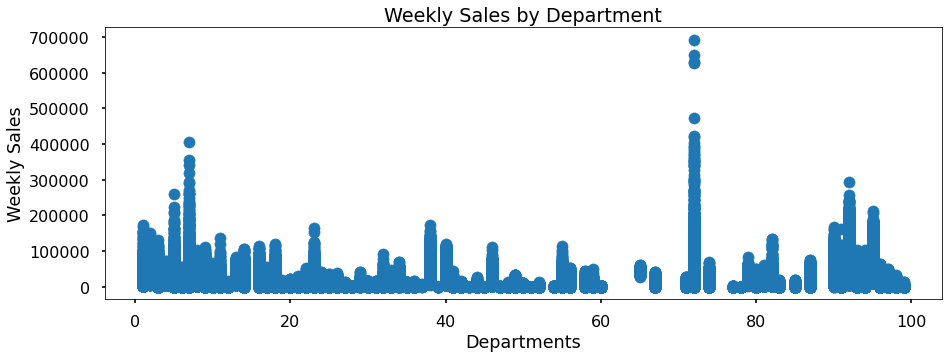

In [44]:
# Weekly Sales vs Dept (scatter plot with pyplot)
x = df_tr['Dept']
y = df_tr['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')

plt.scatter(x,y) # we see the values of each weekly sales
plt.show()

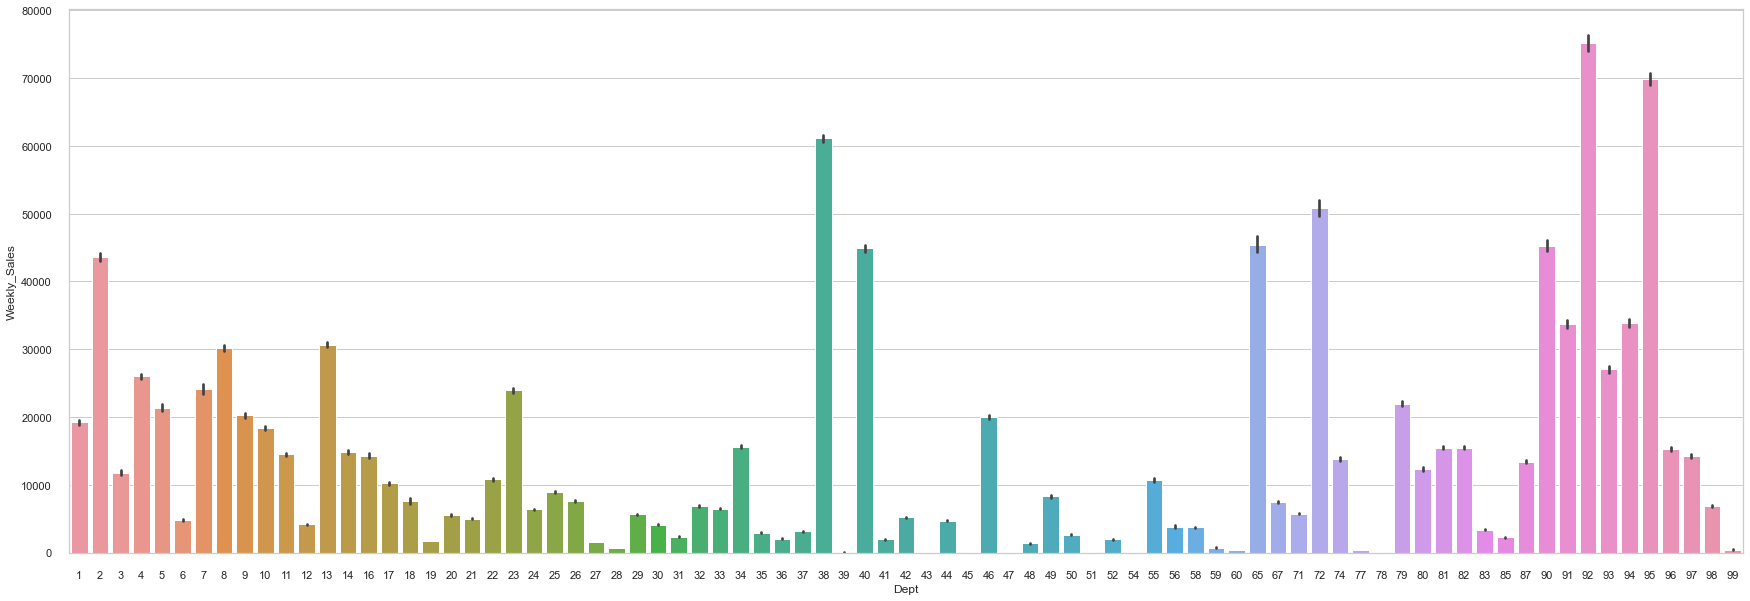

In [45]:
# Weekly Sales vs Dept (bar plot with seaborn)
plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df_tr) # we see the average of sales here

From the first graph, it is seen that one department between 60-80(I assume it is 72), has higher sales values (max value is higher). But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department, I think. It has higher values is some seasons but on average 92 is higher.

In [46]:
df_tr[df_tr['Dept']==72]['Weekly_Sales'].mean()

50852.9939770459

In [47]:
df_tr[df_tr['Dept']==92]['Weekly_Sales'].mean()

75204.8705314685

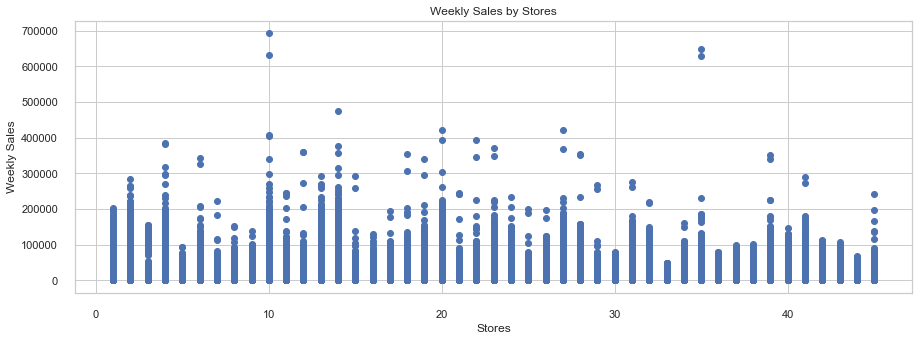

In [48]:
# Weekly Sales vs Stores (scatter plot with pyplot)
x = df_tr['Store']
y = df_tr['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')

plt.scatter(x,y) # we see the values of each weekly sales
plt.show()

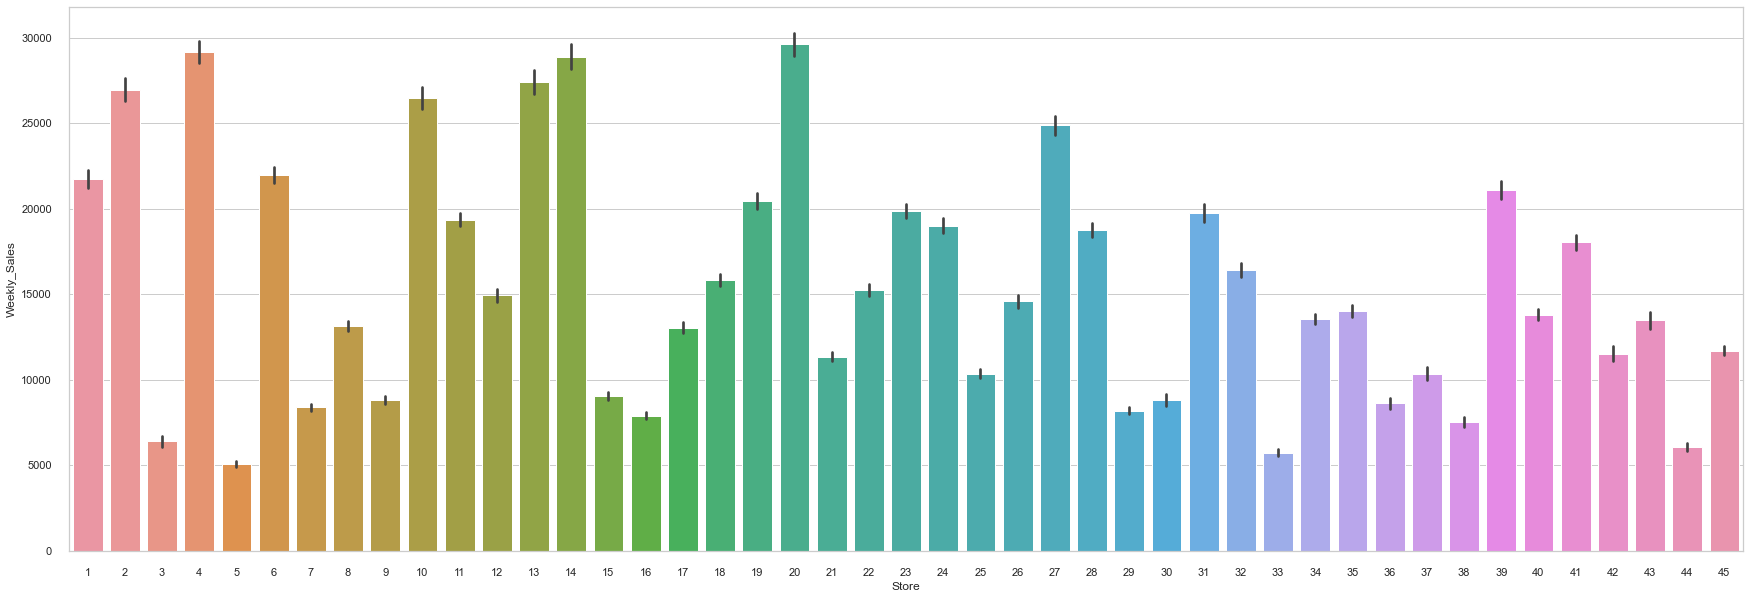

In [49]:
# Weekly Sales vs Stores (bar plot with seaborn)
plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df_tr) # we see the average of sales here

Same thing happens in stores. From the first graph, some stores has higher sales (10 and 35) but on average store 20 is the best and 4 and 14 following it.

### Changing Date to Datetime and Creating New Columns

In [50]:
# convert to datetime
df_tr['Date'] = pd.to_datetime(df_tr['Date'])
# creating new columns
df_tr['week'] = df_tr['Date'].dt.week
df_tr['month'] = df_tr['Date'].dt.month 
df_tr['year'] = df_tr['Date'].dt.year

In [51]:
df_tr.head(5).sort_values('Weekly_Sales',ascending = False)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
330763     35     5 2010-02-05      36414.63      False        27.19   
330762     35     4 2010-02-05      26323.15      False        27.19   
0           1     1 2010-02-05      24924.50      False        42.31   
330761     35     3 2010-02-05      14612.19      False        27.19   
330764     35     6 2010-02-05      11437.81      False        27.19   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  Unemployment  Type  \
330763       2.784        0.0        0.0        0.0  ...         9.262     B   
330762       2.784        0.0        0.0        0.0  ...         9.262     B   
0            2.572        0.0        0.0        0.0  ...         8.106     A   
330761       2.784        0.0        0.0        0.0  ...         9.262     B   
330764       2.784        0.0        0.0        0.0  ...         9.262     B   

          Size  Super_Bowl Labor_Day  Thanksgiving Christmas week month  year  
330763  103681       False     False         False     False    5     2  2010  
330762  103681       False     False         False     False    5     2  2010  
0       151315       False     False         False     False    5     2  2010  
330761  103681       False     False         False     False    5     2  2010  
330764  103681       False     False         False     False    5     2  2010  

[5 rows x 23 columns]

In [52]:
# to see the best months for sales
df_tr.groupby('month')['Weekly_Sales'].mean().sort_values(ascending = False)

month
12    19425.798603
11    17534.964277
6     16397.605478
8     16113.800069
2     16048.701191
7     15905.472425
5     15845.556200
4     15696.435193
3     15464.817698
10    15279.182119
9     15147.216063
1     14182.239153
Name: Weekly_Sales, dtype: float64

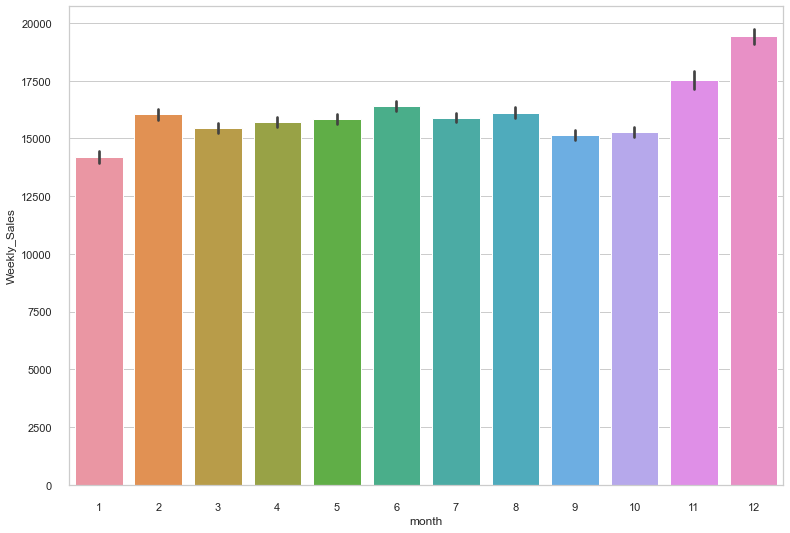

In [53]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df_tr)

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

In [54]:
# to see the best years for sales
df_tr.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

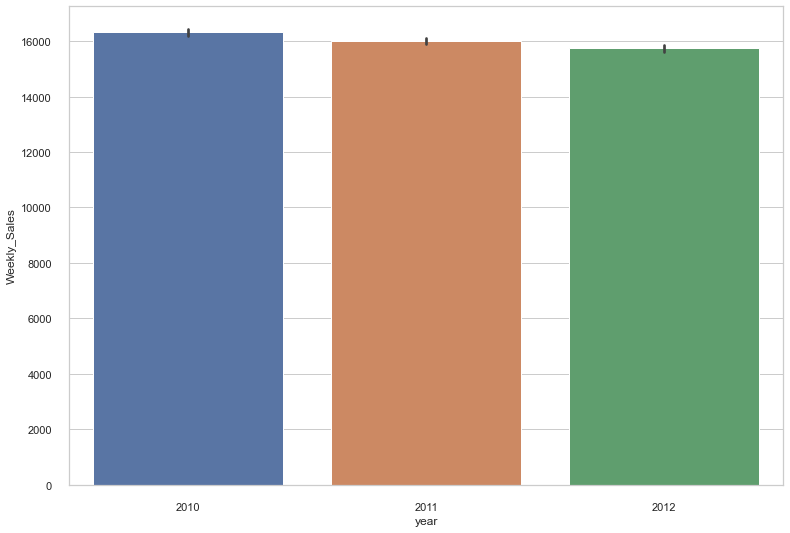

In [55]:
# sales by year
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="Weekly_Sales", data=df_tr)
sns.set(rc = {'figure.figsize':(10,4)})

<AxesSubplot:xlabel='month'>

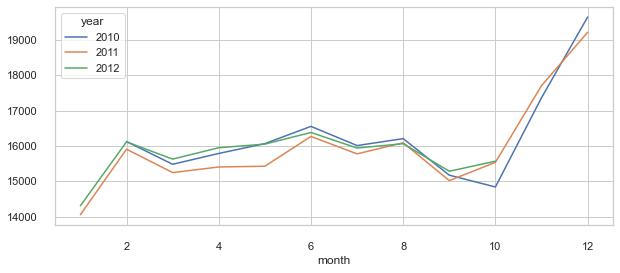

In [56]:
# sales by month for each year
sns.set_theme(style="whitegrid")
monthly_sales = pd.pivot_table(df_tr, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

In [57]:
# sales by week
df_tr.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

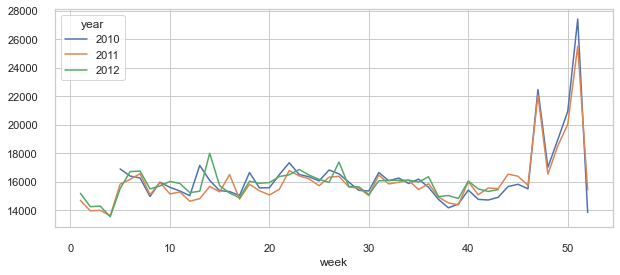

In [58]:
weekly_sales = pd.pivot_table(df_tr, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed. 

### Fuel Price, CPI , Unemployment , and Temperature Effects on Sales

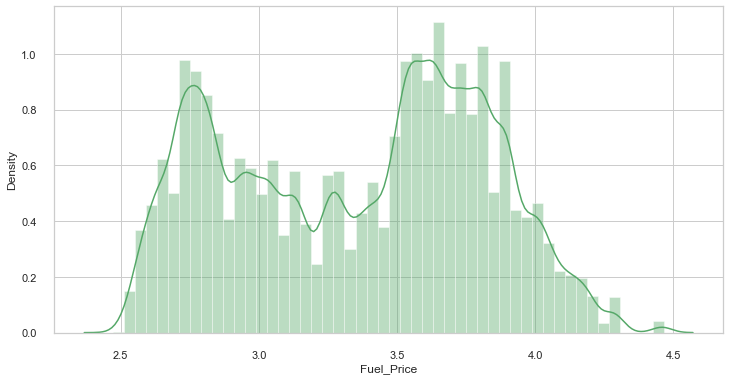

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(df_tr['Fuel_Price'],color='g')
plt.show()

<AxesSubplot:xlabel='Fuel_Price'>

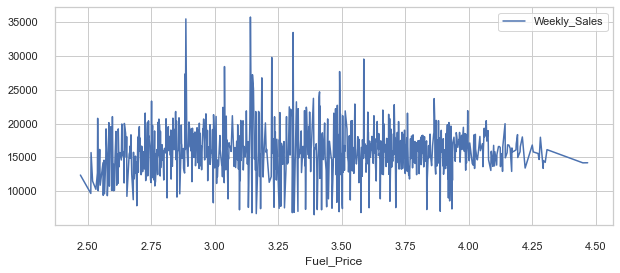

In [60]:
fuel_price = pd.pivot_table(df_tr, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

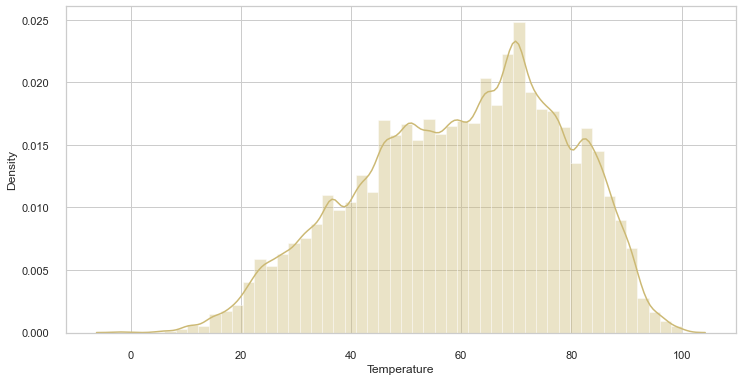

In [61]:
plt.figure(figsize=(12,6))
sns.distplot(df_tr['Temperature'],color='y')
plt.show()

<AxesSubplot:xlabel='Temperature'>

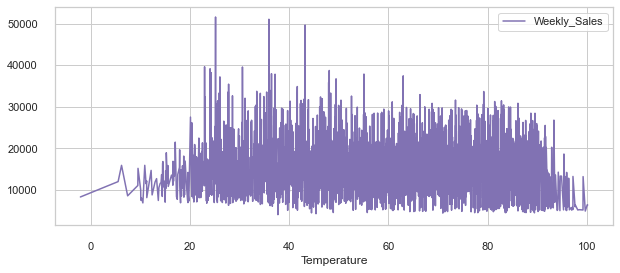

In [62]:
fuel_price = pd.pivot_table(df_tr, values = "Weekly_Sales", index= "Temperature")
fuel_price.plot(color = 'm')

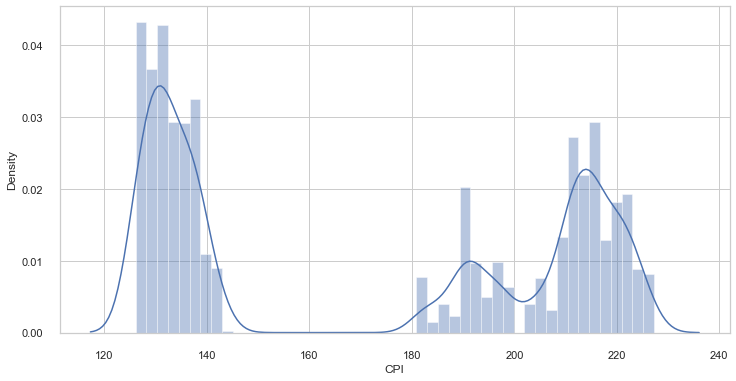

In [63]:
plt.figure(figsize=(12,6))
sns.distplot(df_tr['CPI'],color='b')
plt.show()

<AxesSubplot:xlabel='CPI'>

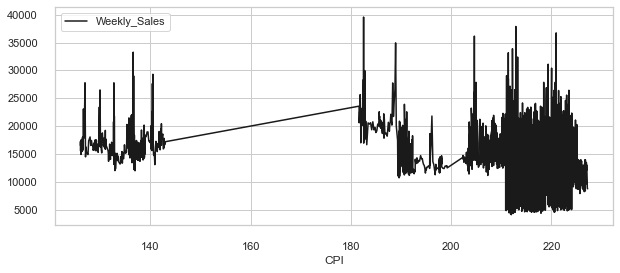

In [64]:
fuel_price = pd.pivot_table(df_tr, values = "Weekly_Sales", index= "CPI")
fuel_price.plot(color = 'k')

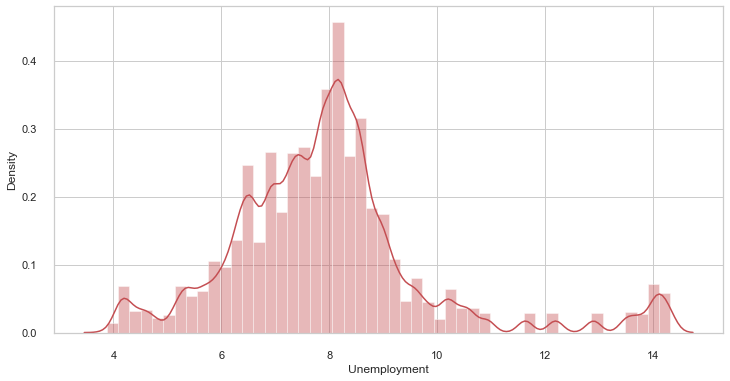

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(df_tr['Unemployment'],color='r')
plt.show()

<AxesSubplot:xlabel='Unemployment'>

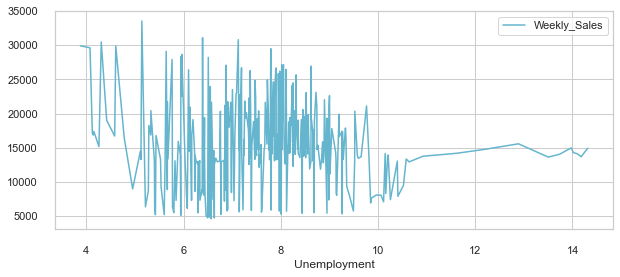

In [66]:
fuel_price = pd.pivot_table(df_tr, values = "Weekly_Sales", index= "Unemployment")
fuel_price.plot(color = 'c')

From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [67]:
# assign new data frame to csv for using after here
df_tr.to_csv('train_clean.csv')

### Findings and Explorations

##### Cleaning Process

- The data has no too much missing values. All columns was checked. 
- I choose rows which has higher than 0 weekly sales. Minus values are 0.3% of data. So, I dropped them.
- Null values in markdowns changed to zero. Because, they were written as null if there were no markdown on this department. 

#### Explorations & Findings

- There are 45 stores and 81 department in data. Departments are not same in all stores. 
- Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time. 
- Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales. 
- Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
- As expected, holiday average sales are higher than normal dates.
- Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
- Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
- It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May. 
- January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
- CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales. 


# <center>3. Predictive Modeling

We will try different machine learning regressors to predict sales to find the best model that gives us the best results (highest R2 and lowest RMSE)

### 3.1 Random Forest



In [68]:
df = load_data('train_clean.csv')

train_clean.csv
Shape: (420212, 24)


Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday  \
371179      292872     30    13  2012-07-06      11267.91      False   
211570      162434     17    83  2011-06-24        437.34      False   
400368      380539     40    90  2012-09-14      59483.14      False   
52195        50044      6    36  2010-06-04      13825.00      False   
378639      302854     31    93  2012-07-20      64837.94      False   
90949       110004     12     5  2010-09-10      17211.13       True   
401952       78179      8     9  2012-09-14      16040.38      False   
44052       278082     29     1  2010-05-21      10290.83      False   
285567      233834     24    35  2011-12-16       3640.10      False   
167658      250821     26    27  2011-03-11        719.44      False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  ...  Unemployment  \
371179        85.26       3.227     799.32       0.00  ...         6.565   
211570        60.99       3.668       0.00       0.00  ...         6.774   
400368        59.38       3.988    5593.11       0.00  ...         4.156   
52195         79.44       2.705       0.00       0.00  ...         7.092   
378639        84.25       3.311    2331.17      10.59  ...         6.565   
90949         83.63       3.044       0.00       0.00  ...        14.180   
401952        67.21       3.717    4678.98       0.00  ...         5.401   
44052         59.99       2.961       0.00       0.00  ...        10.160   
285567        36.00       3.611    6244.37       9.09  ...         8.454   
167658        28.13       3.600       0.00       0.00  ...         7.907   

        Type    Size  Super_Bowl  Labor_Day Thanksgiving  Christmas  week  \
371179     C   42988       False      False        False      False    27   
211570     B   93188       False      False        False      False    25   
400368     A  155083       False      False        False      False    37   
52195      A  202505       False      False        False      False    22   
378639     A  203750       False      False        False      False    29   
90949      B  112238       False       True        False      False    36   
401952     A  155078       False      False        False      False    37   
44052      B   93638       False      False        False      False    20   
285567     A  203819       False      False        False      False    50   
167658     A  152513       False      False        False      False    10   

        month  year  
371179      7  2012  
211570      6  2011  
400368      9  2012  
52195       6  2010  
378639      7  2012  
90949       9  2010  
401952      9  2012  
44052       5  2010  
285567     12  2011  
167658      3  2011  

[10 rows x 24 columns]

------------------------------------------------------------


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    420212 non-null  int64  
 1   Store         420212 non-null  int64  
 2   Dept          420212 non-null  int64  
 3   Date          420212 non-null  object 
 4   Weekly_Sales  420212 non-null  float64
 5   IsHoliday     420212 non-null  bool   
 6   Temperature   420212 non-null  float64
 7   Fuel_Price    420212 non-null  float64
 8   MarkDown1     420212 non-null  float64
 9   MarkDown2     420212 non-null  float64
 10  MarkDown3     420212 non-null  float64
 11  MarkDown4     420212 non-null  float64
 12  MarkDown5     420212 non-null  float64
 13  CPI           420212 non-null  float64
 14  Unemployment  420212 non-null  float64
 15  Type          420212 non-null  object 
 16  Size          420212 non-null  int64  
 17  Super_Bowl    420212 non-null  bool   
 18  Labo

##### Fixing data types of columns

In [70]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [71]:
# changing date to datetime
df['Date'] = pd.to_datetime(df['Date'])

##### Imputing missing values

In [72]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

There is no missing data

##### Encoding the Data 

For preprocessing our data, I will change holidays boolean values to 0-1 and replace type of the stores from A, B, C to 1, 2, 3. 

In [73]:
 # to keep original dataframe taking copy of it
df_encoded = df.copy()

In [74]:
# changing A,B,C to 1-2-3
type_group = {'A':1, 'B': 2, 'C': 3}
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [75]:
# changing T,F to 0-1
bool_cols = ['Super_Bowl','Thanksgiving','Labor_Day','Christmas','IsHoliday']
for col in bool_cols:
    df_encoded[col] = df_encoded[col].astype(bool).astype(int)

In [76]:
# taking the copy of encoded df to keep it original
df_new = df_encoded.copy()

##### Observation of Interactions between Features

First, I will drop divided holiday columns from my data and try without them. To keep my encoded data safe, I assigned my dataframe to new one and I will use for this. 

In [77]:
# dropping created holiday columns 
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) 

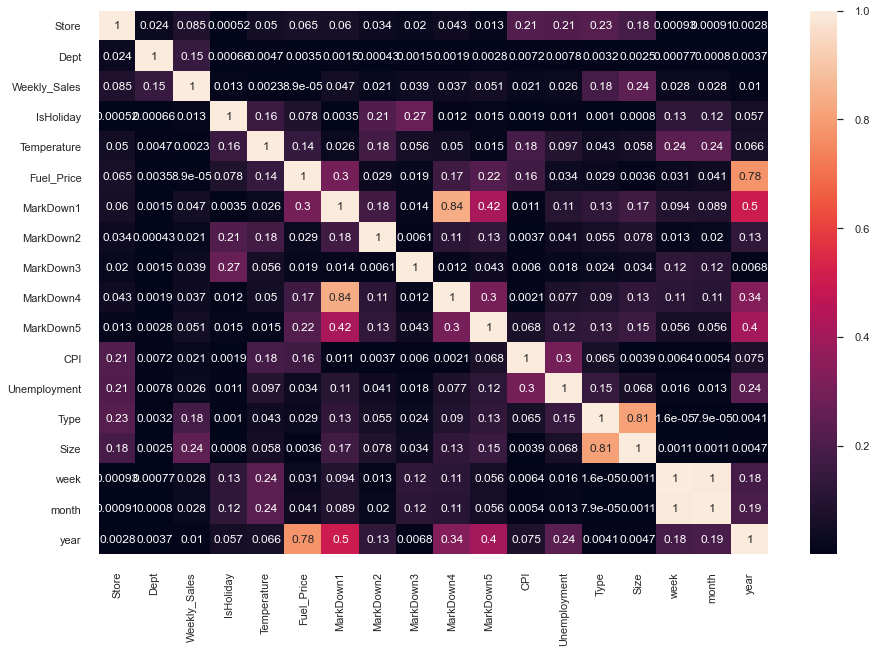

In [78]:
# To see the correlations
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr().abs(),annot=True)
plt.show()

In [79]:
# Let's print the correlation of features with 'Weekly_Sales'
df_new.corr()['Weekly_Sales'][:].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.244117
Dept            0.148749
MarkDown5       0.050598
MarkDown1       0.047249
MarkDown3       0.038522
MarkDown4       0.037470
month           0.028401
week            0.027659
MarkDown2       0.020948
IsHoliday       0.012843
Fuel_Price      0.000089
Temperature    -0.002339
year           -0.010015
CPI            -0.021162
Unemployment   -0.025806
Store          -0.085117
Type           -0.182229
Name: Weekly_Sales, dtype: float64

Fuel price and Temperature have no significant effect on weekly sales (<0.01), so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them as well. It can create multicollinearity problem. So, first I will try without them.

Size, type, department, and store  are highly correlated with weekly sales.

In [80]:
# dropping columns
drop_col = ['Fuel_Price','Temperature','MarkDown4','MarkDown5']
df_new.drop(drop_col, axis=1, inplace=True) 

In [81]:
# sorting according to date
df_new = df_new.sort_values(by='Date', ascending=True)

##### Train-Test Splits

Our date column has continuous values. To keep the date features continue, I will not take random splitting. so, I split data manually according to 70%.

In [82]:
# taking train part
train_data = df_new[:int(0.7*(len(df_new)))]
# taking test part
test_data = df_new[int(0.7*(len(df_new))):] 

# Define target column (y)
target = "Weekly_Sales"
# Define independent columns (x): all columns except weekly sales
used_cols = [col for col in df_new.columns.to_list() if col not in [target]] 

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [83]:
# to keep train and test X values together
X = df_new[used_cols]

##### Deleting Date column

We have enough information in our date such as week of the year. So, I drop date columns.

In [84]:
# dropping date from train
X_train = X_train.drop(['Date'], axis=1)
# dropping date from test
X_test = X_test.drop(['Date'], axis=1) 

##### Random Forest Regressor

To tune the regressor, I can use gridsearch but it takes too much time for this type of data which has many rows and columns. So, I choose regressor parameters manually. I changed the parameters each time and try to find the best result.

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score, balanced_accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline

In [86]:
RF = RandomForestRegressor(n_estimators=50, random_state=42, 
                           n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,RF)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# model evaluation
print('Model: ', 'RandomForestRegressor' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  RandomForestRegressor
RMSE:  10149.73
R2 score  : 0.79


For the first trial, the Random Forest (RF) model with some dropped columns has an RMSE around 10,149 and its R2 score is 0.79

### 3.2 Decission Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=3,random_state=0)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,DT)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# model evaluation
print('Model: ', 'DecisionTreeRegressor' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  DecisionTreeRegressor
RMSE:  17043.04
R2 score  : 0.41


### 3.3 Multiple Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(normalize=True)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,LR)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# model evaluation
print('Model: ', 'LinearRegression' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  LinearRegression
RMSE:  21107.64
R2 score  : 0.09


### 3.4 Gradient Boosting regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,GB)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# model evaluation
print('Model: ', 'GradientBoostingRegressor' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  GradientBoostingRegressor
RMSE:  10612.17
R2 score  : 0.77


#### <center> Best model

Among the regression models we ran, Random Forest (RF) has the lowest RMSE and the highest R2 score which makes it the best model. Let's continue our analysis by working on this model to improve our analysis.

In [90]:
RF = RandomForestRegressor(n_estimators=50, random_state=42, 
                           n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,RF)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# model evaluation
print('Model: ', 'RandomForestRegressor' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  RandomForestRegressor
RMSE:  10149.73
R2 score  : 0.79


##### Feature Importance with random forest

<AxesSubplot:>

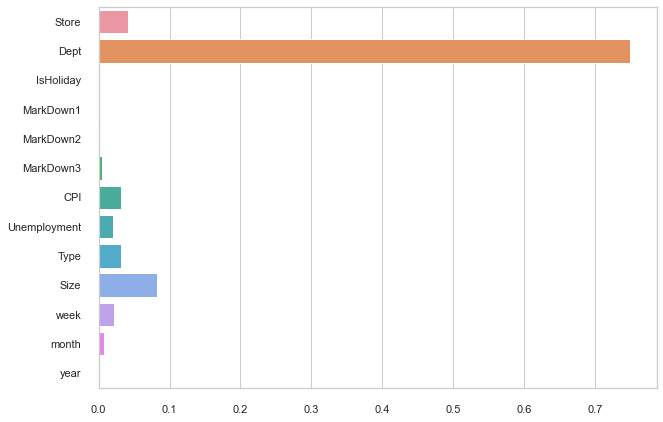

In [91]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
sns.barplot(RF.feature_importances_,X_train.columns)

##### Random forest model with important features

In [92]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'CPI', 'Unemployment', 'Type', 'Size', 'week', 'month', 'year'],
      dtype='object')

In [93]:
# dropping IsHoliday, MarkDown1, MarkDown2, and year
X_train_imp = X_train.drop(['IsHoliday','MarkDown1','MarkDown2','year'], axis=1)
X_test_imp = X_test.drop(['IsHoliday','MarkDown1','MarkDown2','year'], axis=1)

In [94]:
RF = RandomForestRegressor(n_estimators=50, random_state=42, 
                           n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,RF)

pipe.fit(X_train_imp, y_train)

# predictions on train set
y_pred = pipe.predict(X_train_imp)

# predictions on test set
y_pred_test = pipe.predict(X_test_imp)

# model evaluation
print('Model: ', 'RandomForestRegressor with important features' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  RandomForestRegressor with important features
RMSE:  6789.25
R2 score  : 0.91


It gives better results than baseline.

##### Random forest model with all columns

Now, I want to make sure that my model will learn from the columns which I dropped or not. So, I will apply my model to whole encoded data again.

In [95]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int32         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  int64         
 15  Size          420

In [96]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [97]:
# to get together train,test splits
X_enc = df_encoded[used_cols1]

In [98]:
# dropping date column for whole X
X_enc = X_enc.drop(['Date'], axis=1)

In [99]:
# dropping date from train and test
X_train_enc = X_train_enc.drop(['Date'], axis=1) 
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [100]:
RF = RandomForestRegressor(n_estimators=50, random_state=42, 
                           n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,RF)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test = pipe.predict(X_test_enc)

# model evaluation
print('Model: ', 'RandomForestRegressor with all columns' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test_enc,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test_enc,y_pred_test).round(decimals=2))

Model:  RandomForestRegressor with all columns
RMSE:  11445.89
R2 score  : 0.73


This model does not give us better results. So, the model with important features gives us the best results.

### Best model: Random forest with important features

In [101]:
RF = RandomForestRegressor(n_estimators=50, random_state=42, 
                           n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,RF)

pipe.fit(X_train_imp, y_train)

# predictions on train set
y_pred = pipe.predict(X_train_imp)

# predictions on test set
y_pred_test = pipe.predict(X_test_imp)

# model evaluation
print('Model: ', 'RandomForestRegressor with important features' )
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_test)).round(decimals=2))
print("R2 score  :", r2_score(y_test,y_pred_test).round(decimals=2))

Model:  RandomForestRegressor with important features
RMSE:  6789.25
R2 score  : 0.91


Text(0.5, 0, 'Random Forest Feature Importance')

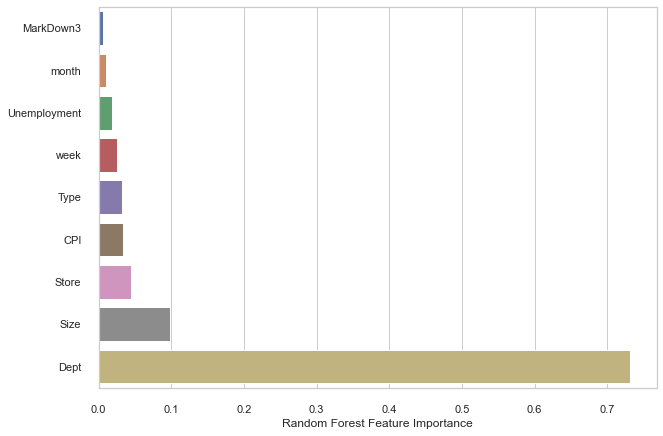

In [102]:
sorted_idx = RF.feature_importances_.argsort()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
sns.barplot(RF.feature_importances_[sorted_idx],X_train_imp.columns[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

##### showing results together

In [103]:
# showing results together
df_results = pd.DataFrame(columns=["Model", "RMSE",'R2 score']) 

df_results = df_results.append({     
     "Model": 'RandomForest with important features' ,
      "RMSE": 6789 , 
       'R2 score' : 0.91}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForest with imp & unimp features' ,
      "RMSE": 10149 , 
       'R2 score' : 0.79}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'GradientBoostingRegressor' ,
      "RMSE": 10612 , 
       'R2 score' : 0.77}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor with all columns' ,
      "RMSE": 11445 , 
       'R2 score' : 0.73}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'DecisionTreeRegressor' ,
      "RMSE": 17043 , 
       'R2 score' : 0.41}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'LinearRegression' ,
      "RMSE": 21107 , 
       'R2 score' : 0.09}, ignore_index=True)
df_results

Model   RMSE  R2 score
0    RandomForest with important features   6789      0.91
1  RandomForest with imp & unimp features  10149      0.79
2               GradientBoostingRegressor  10612      0.77
3  RandomForestRegressor with all columns  11445      0.73
4                   DecisionTreeRegressor  17043      0.41
5                        LinearRegression  21107      0.09

# Time Series Models

In [104]:
# Time-series libraries
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [105]:
df = load_data('train_clean.csv')

train_clean.csv
Shape: (420212, 24)


Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday  \
315830       37257      4    81  2012-02-24      34043.67      False   
102282      159848     17     1  2010-10-08      20468.25      False   
263324      213152     22    13  2011-10-21      36904.09      False   
87945        50988      6    93  2010-09-03      42043.19      False   
142820      393308     42    12  2011-01-07         82.95      False   
167347      151732     16    32  2011-03-11       4750.88      False   
410264       58734      6    23  2012-10-05      24388.36      False   
348572      345424     36    20  2012-05-11         20.00      False   
360547       57564      6    94  2012-06-08      47004.80      False   
303180      125227     13    93  2012-01-27      46195.67      False   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  ...  Unemployment  \
315830        41.31       3.541    9777.71    4703.88  ...         4.607   
102282        58.06       2.841       0.00       0.00  ...         6.885   
263324        59.30       3.618       0.00       0.00  ...         7.706   
87945         82.15       2.577       0.00       0.00  ...         6.973   
142820        43.43       3.287       0.00       0.00  ...         8.744   
167347        29.36       3.372       0.00       0.00  ...         6.614   
410264        70.84       3.617    9663.09       0.00  ...         5.329   
348572        76.55       3.764     475.61       0.00  ...         6.989   
360547        80.50       3.452   11150.20     188.60  ...         5.964   
303180        34.32       3.058    3743.00    3744.31  ...         6.104   

        Type    Size  Super_Bowl  Labor_Day Thanksgiving  Christmas  week  \
315830     A  205863       False      False        False      False     8   
102282     B   93188       False      False        False      False    40   
263324     B  119557       False      False        False      False    42   
87945      A  202505       False      False        False      False    35   
142820     C   39690       False      False        False      False     1   
167347     B   57197       False      False        False      False    10   
410264     A  202505       False      False        False      False    40   
348572     A   39910       False      False        False      False    19   
360547     A  202505       False      False        False      False    23   
303180     A  219622       False      False        False      False     4   

        month  year  
315830      2  2012  
102282     10  2010  
263324     10  2011  
87945       9  2010  
142820      1  2011  
167347      3  2011  
410264     10  2012  
348572      5  2012  
360547      6  2012  
303180      1  2012  

[10 rows x 24 columns]

------------------------------------------------------------


In [107]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [108]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

In [109]:
#changing data to datetime for decomposing
df["Date"] = pd.to_datetime(df["Date"]) 

In [110]:
#seting date as index
df.set_index('Date', inplace=True) 

# Plotting Sales

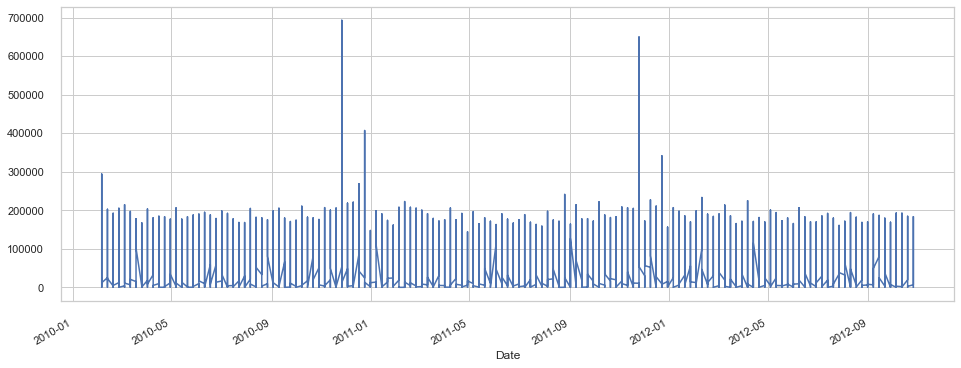

In [111]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

In [112]:
df_week = df.resample('W').mean() #resample data as weekly

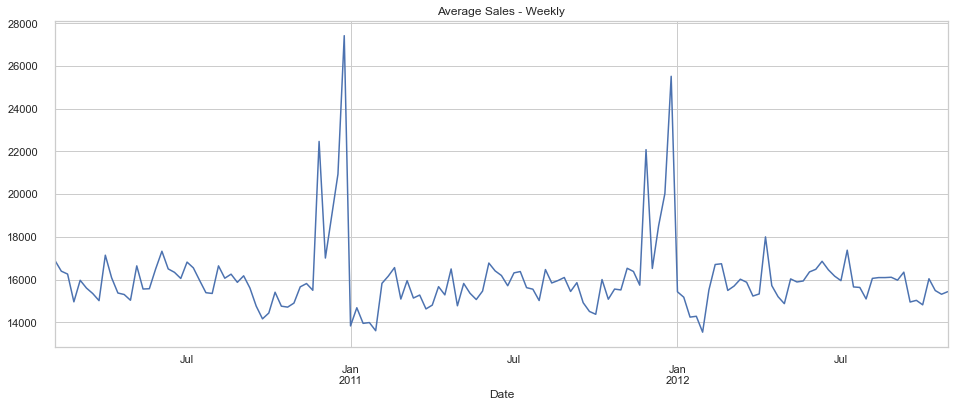

In [113]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [114]:
df_month = df.resample('MS').mean() # resampling as monthly

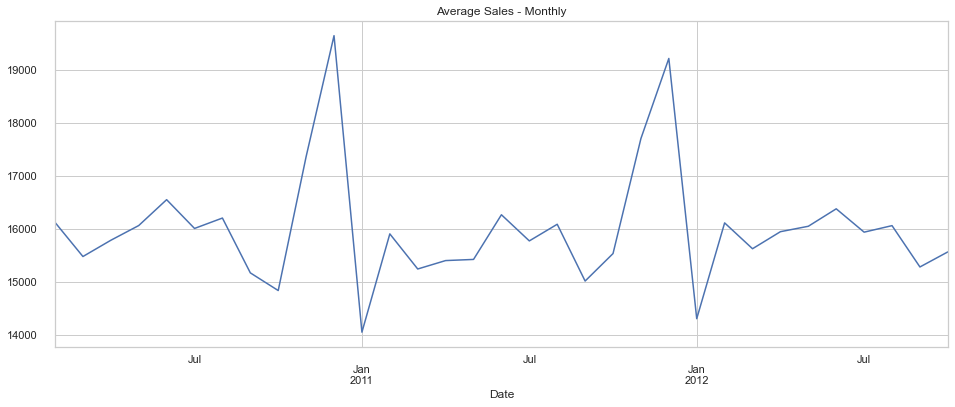

In [115]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with **weekly** resampled data.

# Stationary? 2-weeks Rolling Mean and Std

In [122]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

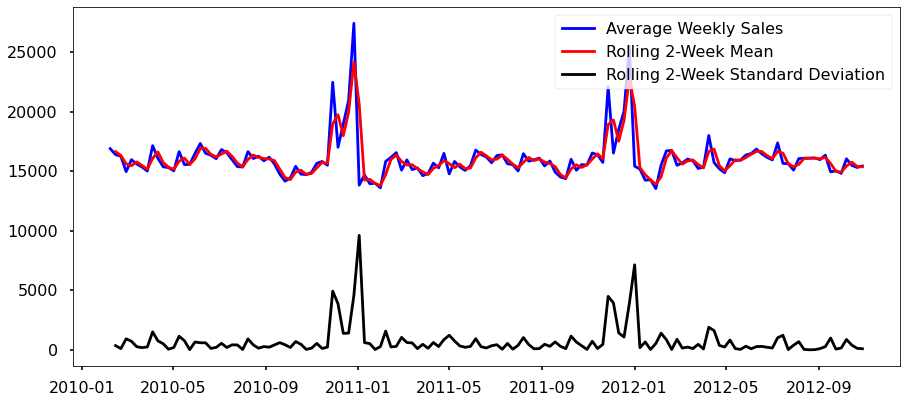

In [123]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

My data is non-stationary. So, I will try to find more stationary version on it. 

# Train - Test Split of Weekly Data

To take train-test splits continuosly, I split them manually, not random.

In [117]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


In [118]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

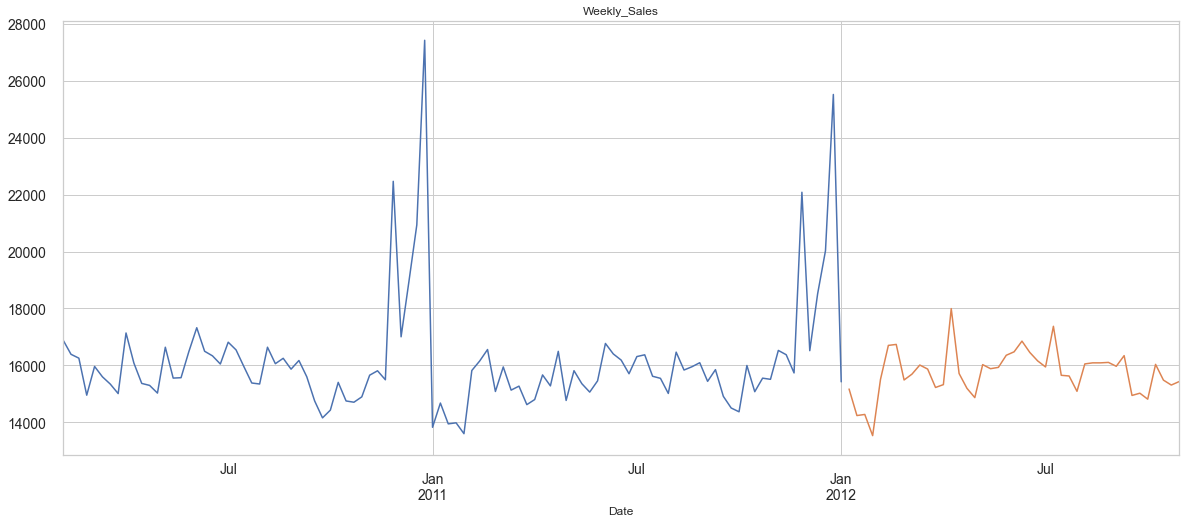

In [119]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Blue line represents my train data, orange is test data.

# Decomposing Weekly Data to Observe Seasonality

In [120]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

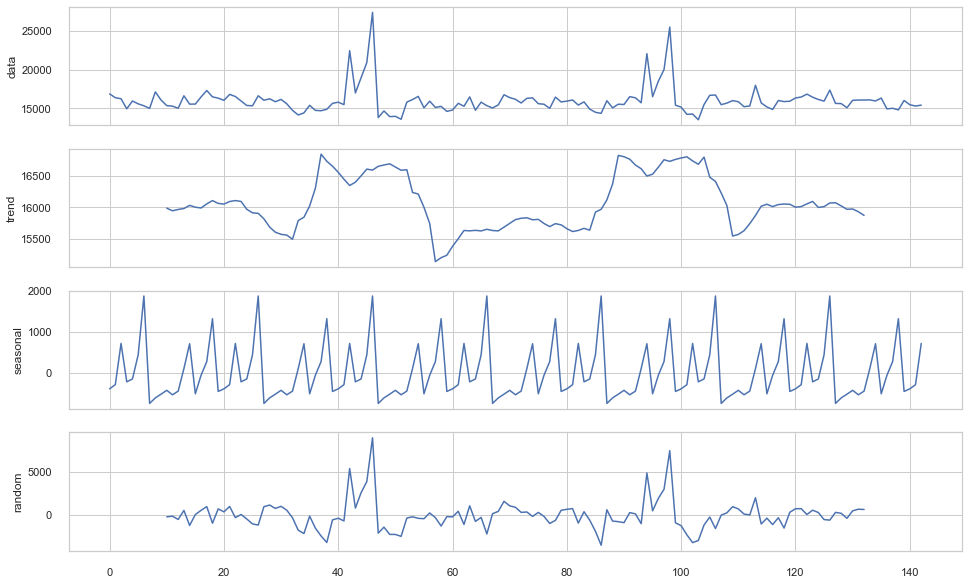

In [121]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

# Trying To Make Data More Stationary

Now, I will try to make my data more stationary. To do this, I will try model with differenced, logged and shifted data.

## 1. Difference

In [122]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [123]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

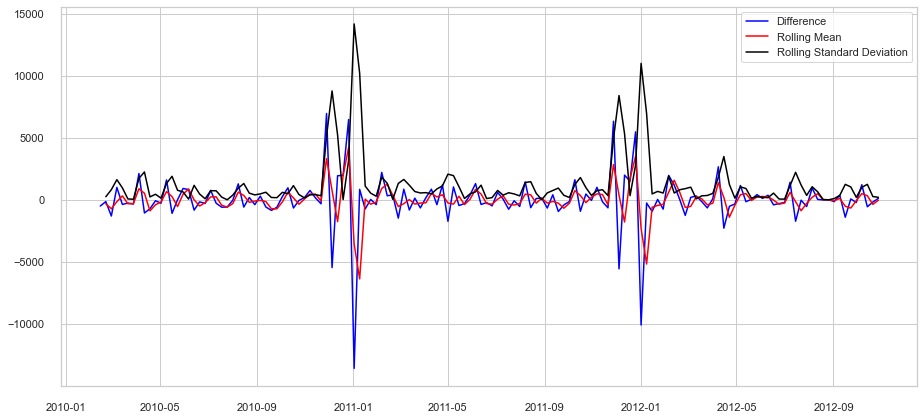

In [124]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 2.Shift

In [125]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [126]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

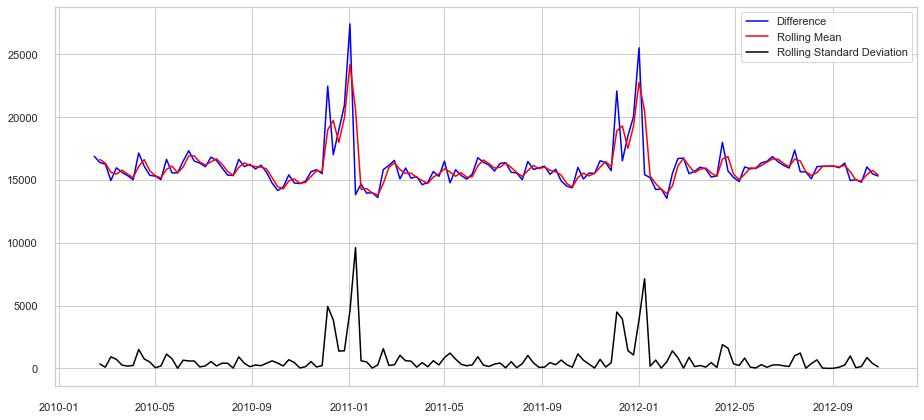

In [127]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 3.Log

In [128]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [129]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

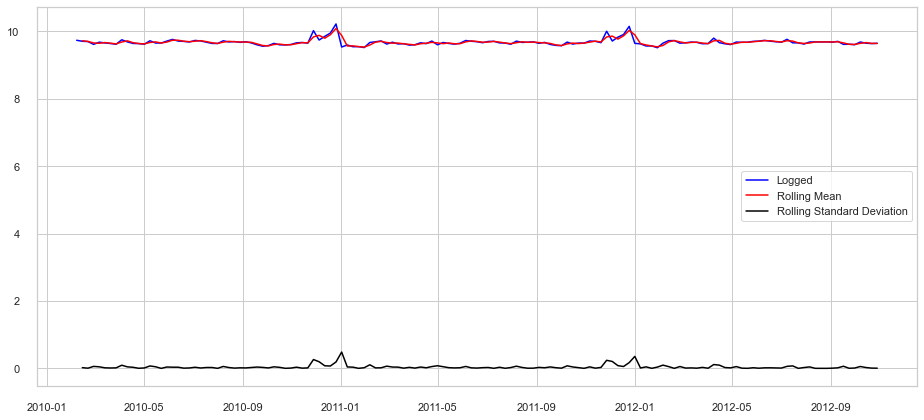

In [130]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Auto-ARIMA MODEL

I tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data. 

# Train-Test Split

In [131]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [132]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

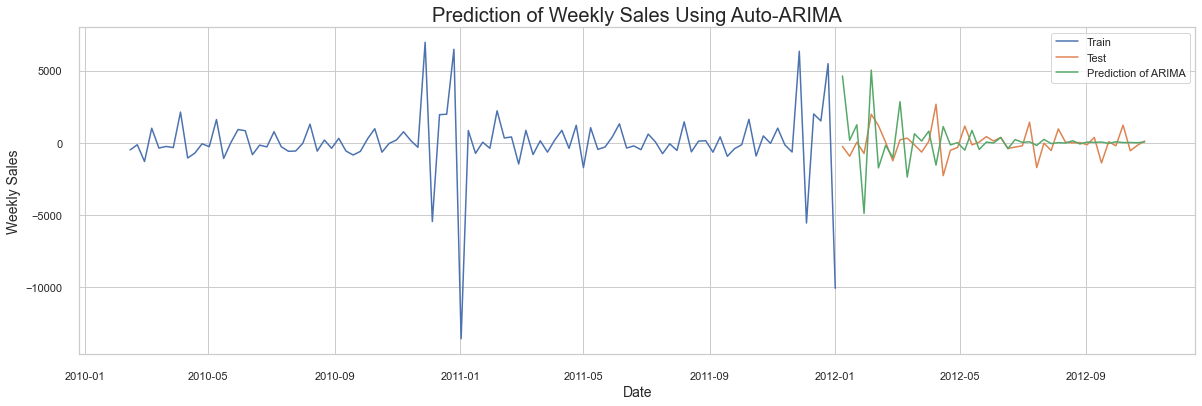

In [133]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

I do not like the pattern of predictions so I decided to try another model.

# ExponentialSmoothing

I checked suitable Holt-Winters models according tp my data. Exponential Smooting are used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future. 

My difference data has some minus and zero values, so I used additive seasonal and trend instead of multiplicative. Seasonal periods are chosen from the decomposed graphs above. For tuning the model with iterations take too much time so, I changed and tried model for different parameters and found the best parameters and fitted them to model.

C:\Users\17019\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


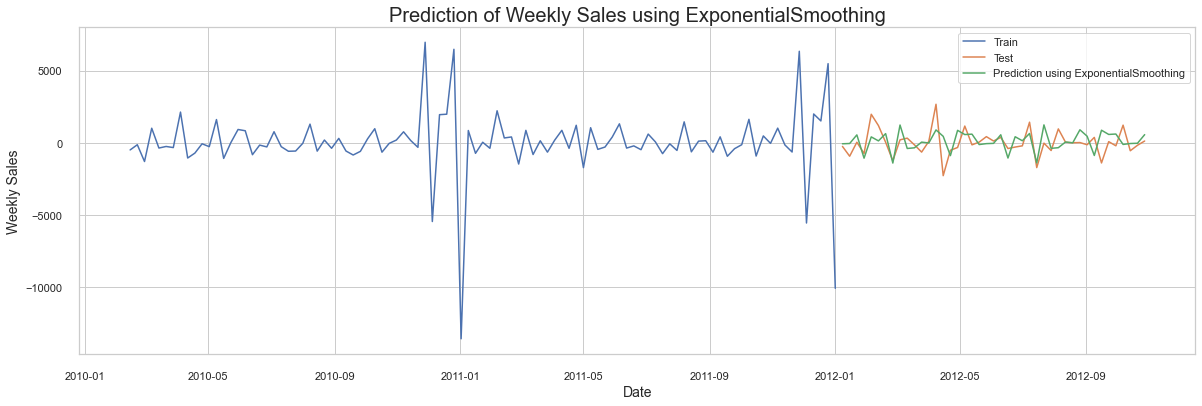

In [134]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [137]:
# model evaluation
print("RMSE: ", np.sqrt(mean_squared_error(test_data_diff,y_pred)).round(decimals=2))

RMSE:  924.4


At the end, I found best results for my data with Exponential Smoothing Model.